## Extra tips for obstacle avoidance 

One approach involves constructing an occupancy map of the environment. When you detect a potential obstacle, you update this map by marking the estimated location of that obstacle. For example, an occupancy map might look like this:

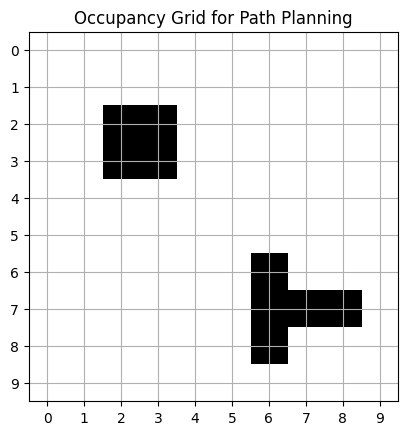

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid size
grid_size = (10, 10)  # 10x10 grid
occupancy_grid = np.zeros(grid_size)

# Mark some obstacles (set 1 for obstacles)
# Example: Creating a block of obstacles
occupancy_grid[2:4, 2:4] = 1  # Obstacle block in (2,2) to (3,3)
occupancy_grid[6:9, 6] = 1    # Vertical obstacle at x = 6
occupancy_grid[7, 7:9] = 1    # Horizontal obstacle at y = 7

# Function to visualize the occupancy grid
def plot_occupancy_grid(grid):
    plt.imshow(grid, cmap='gray_r', origin='upper')
    plt.grid(True)
    plt.xticks(np.arange(grid.shape[1]))
    plt.yticks(np.arange(grid.shape[0]))
    plt.title("Occupancy Grid for Path Planning")
    plt.show()

# Plot the grid
plot_occupancy_grid(occupancy_grid)


**Potential Field Method in Robotics**

The Potential Field Method is a navigation technique in robotics that emulates certain natural physical phenomena to guide a robot toward a goal. Think about how a charged particle moves within an electric or magnetic field, or how a ball naturally rolls downhill due to gravity. In these cases, the movement is influenced by fields or slopes that direct the object toward a particular point—like the source of the field or the lowest point in the valley.

In robotic applications, we replicate this idea by creating an artificial potential field within the robot's operating environment. This field is engineered to pull the robot toward a designated goal location. By carefully designing the characteristics of this potential field, we can induce specific behaviors in the robot, such as moving smoothly toward the target.

**How Does the Potential Field Method Work?**

Imagine a scenario where the robot needs to reach a goal position, and there are no obstacles in its path. Traditionally, you might calculate the robot's position relative to the goal and then determine the exact control actions required—like setting specific velocities or steering angles—to move directly toward the goal.

In contrast, the potential field approach involves the following steps:

1. **Creation of an Attractive Field**: We define a potential field over the entire free space that has its lowest value at the goal position. This field effectively creates a "downhill" slope leading to the goal.

2. **Evaluation of the Field at the Robot's Position**: At each time step, the robot assesses the potential field at its current location.

3. **Calculation of the Induced Force**: The robot computes the gradient (slope) of the potential field at its position. This gradient represents the force acting on the robot, analogous to how gravity would pull a ball downhill.

4. **Movement Toward the Goal**: The robot moves in the direction indicated by the force, which naturally leads it toward the goal.





Obstacles can be avoided using the Potential Field Method by assigning repulsive potential fields to them. While the goal generates an attractive potential field that pulls the robot toward it, each obstacle creates a repulsive field that pushes the robot away. A guide on how to this on python can be found at : https://medium.com/nerd-for-tech/local-path-planning-using-virtual-potential-field-in-python-ec0998f490af